<a href="https://colab.research.google.com/github/klu80082/2420080082-ML/blob/main/2420080082week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (150, 4)
y shape: (150,)


In [3]:
def k_fold_cv(X, y, k=5, n_neighbors=3):
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        X_test = X[start:end]
        y_test = y[start:end]

        X_train = np.vstack((X[:start], X[end:]))
        y_train = np.hstack((y[:start], y[end:]))

        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        print(f"Fold {i+1} Accuracy: {acc:.3f}")

    return np.mean(accuracies)


In [4]:
avg_accuracy = k_fold_cv(X, y, k=5)
print("\nAverage Accuracy:", avg_accuracy)


Fold 1 Accuracy: 1.000
Fold 2 Accuracy: 1.000
Fold 3 Accuracy: 0.833
Fold 4 Accuracy: 0.933
Fold 5 Accuracy: 0.767

Average Accuracy: 0.9066666666666666


In [5]:
def bootstrap_regression(X, y, n_bootstraps=500):
    n = len(X)
    coefs = []

    for _ in range(n_bootstraps):
        idx = np.random.choice(n, n, replace=True)
        X_b = X[idx]
        y_b = y[idx]

        model = LinearRegression()
        model.fit(X_b, y_b)
        coefs.append(model.coef_)

    return np.array(coefs)


In [6]:
X_reg = X[:, :2]
y_reg = X[:, 2]

coefs = bootstrap_regression(X_reg, y_reg)
print("Bootstrap Done")


Bootstrap Done


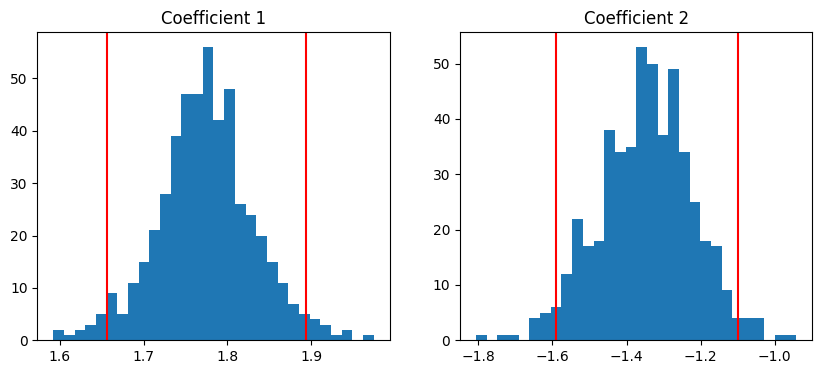

In [7]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(coefs[:,0], bins=30)
plt.axvline(np.percentile(coefs[:,0], 2.5), color='red')
plt.axvline(np.percentile(coefs[:,0], 97.5), color='red')
plt.title("Coefficient 1")

plt.subplot(1,2,2)
plt.hist(coefs[:,1], bins=30)
plt.axvline(np.percentile(coefs[:,1], 2.5), color='red')
plt.axvline(np.percentile(coefs[:,1], 97.5), color='red')
plt.title("Coefficient 2")

plt.show()


In [8]:
for i in range(coefs.shape[1]):
    low = np.percentile(coefs[:, i], 2.5)
    high = np.percentile(coefs[:, i], 97.5)
    print(f"Coefficient {i+1}: [{low:.3f}, {high:.3f}]")


Coefficient 1: [1.656, 1.894]
Coefficient 2: [-1.590, -1.098]
